In [3]:
# pip install seaborn (꾸미는 기능, format)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 데이터 불러오기

In [5]:
stock_df = pd.read_csv("../00_data/stock_daily_prices.csv")
stock_df["Date"] = pd.to_datetime(stock_df["Date"])
stock_df.info

<bound method DataFrame.info of            Date        AAPL          BA          T        MGM         AMZN  \
0    2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1    2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2    2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3    2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4    2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...         ...         ...         ...        ...        ...          ...   
2154 2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155 2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156 2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157 2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158 2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA  

In [11]:
def plot_method(stock_name):
    plt.plot(stock_df["Date"], stock_df[stock_name], label=stock_name, color="b")
    plt.title(f"{stock_name} stock price", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("price(usd)", fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.show()

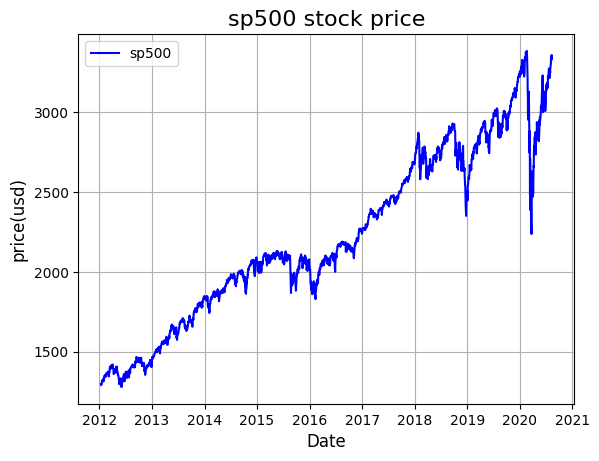

In [12]:
plot_method("sp500")

## 여러 종목의 주가를 비교 ( 여러 선 그래프 )
여러 주식 종목 (AAPL, TSLA, AMZN) 의 주가를 한 그래프에 그려 비교

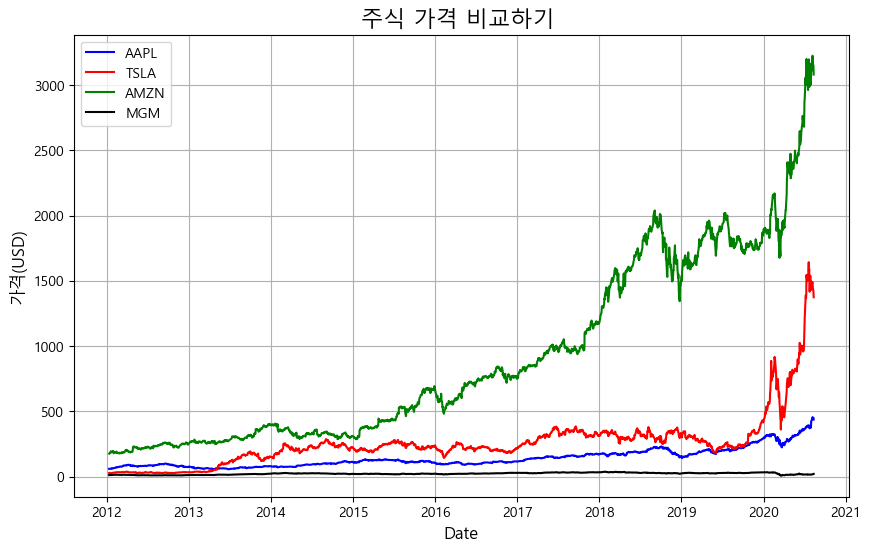

In [19]:
plt.figure(figsize=(10,6))
plt.plot(stock_df["Date"], stock_df["AAPL"], label="AAPL", color="b")
plt.plot(stock_df["Date"], stock_df["TSLA"], label="TSLA", color="r")
plt.plot(stock_df["Date"], stock_df["AMZN"], label="AMZN", color="g")
plt.plot(stock_df["Date"], stock_df["MGM"], label="MGM", color="black")
plt.rc("font", family="Malgun Gothic")
plt.title("주식 가격 비교하기 ", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("가격(USD)" ,fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

## TSLA 주가의 분포를 나타내는 히스토그램
- 데이터 분포 확인 (표준 집단, 모집단)

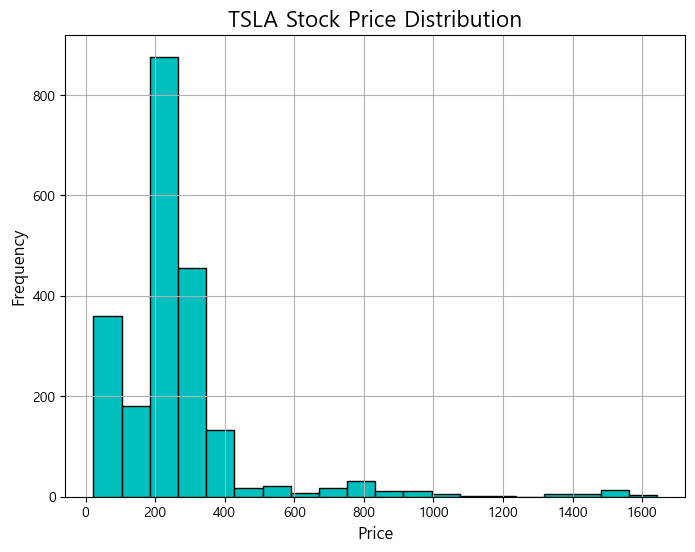

In [21]:
plt.figure(figsize=(8,6))
# hist = 히스토그램을 나타내는 메서드
plt.hist(stock_df["TSLA"], bins=20, color="c", edgecolor="black")

plt.title("TSLA Stock Price Distribution", fontsize=16)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.show()

## 막대 그래프 : 주식 상승과 하락 시각화
막대 그래프는 카테고리별 데이터를 시각화하는데 좋다 <br>
주식의 일일 변동률(상승/하락)을 시각화

c:\conda\envs\dataAnalysis\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


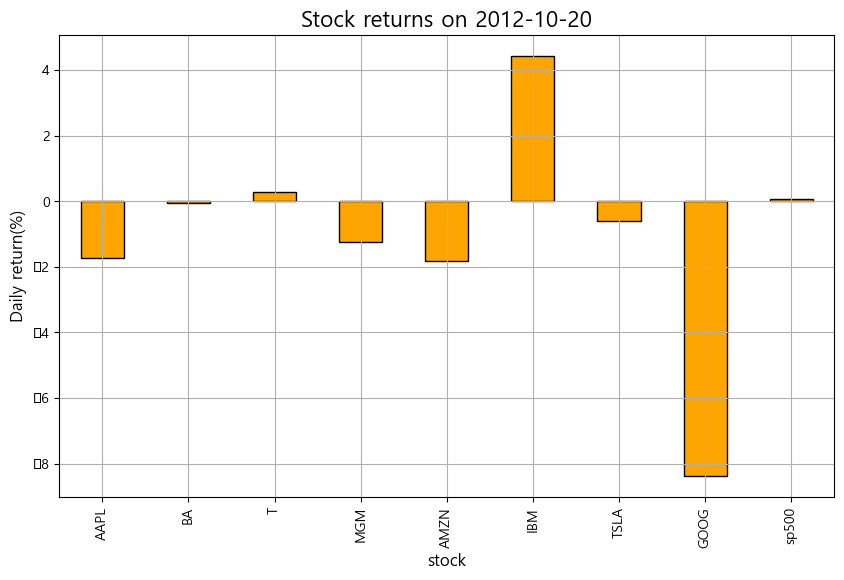

In [24]:
# 일일 변동률 계산 ( pct_change : 전달 대비 계산 )
daily_returns = stock_df.set_index("Date").pct_change()*100

specific_day_returns = daily_returns.loc["2012-01-20"]

plt.figure(figsize=(10,6))
specific_day_returns.plot(kind="bar", color="orange", edgecolor="black")

plt.title("Stock returns on 2012-10-20", fontsize=16)
plt.xlabel("stock", fontsize=12)
plt.ylabel("Daily return(%)", fontsize=12)
plt.grid(True)
plt.show()

## 히트맵을 통한 상관관계 분석

c:\conda\envs\dataAnalysis\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\conda\envs\dataAnalysis\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


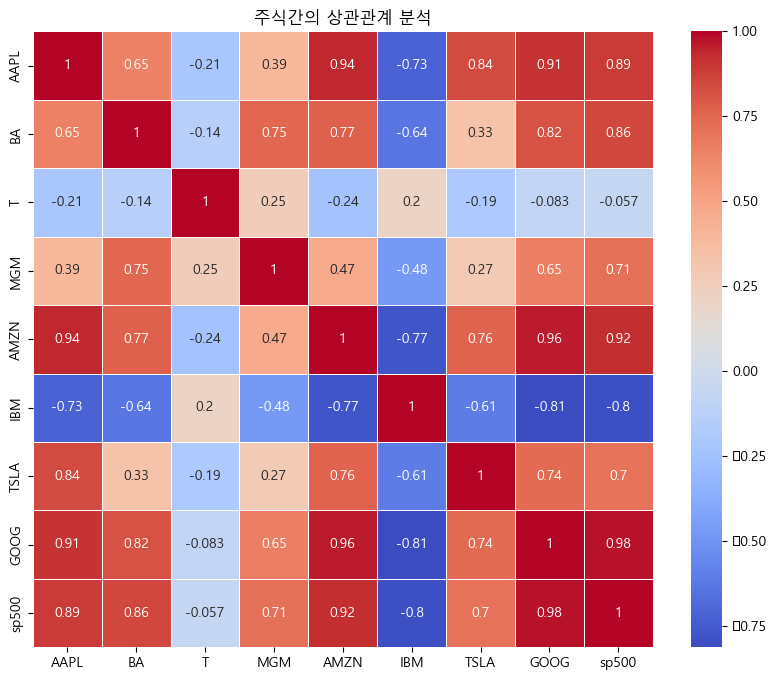

In [29]:
stock_df = pd.read_csv("../00_data/stock_daily_prices.csv")
plt.rc("font", family="Malgun Gothic")

data_without_date = stock_df.drop(columns=["Date"])

corr_matrix = data_without_date.corr()
plt.figure(figsize=(10,8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("주식간의 상관관계 분석")

plt.show()